# Text Mining Project

Text Mining project


In [1]:
#pip install langdetect


In [1]:
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:


train = pd.read_excel("train.xlsx")
train_reviews = pd.read_excel("train_reviews.xlsx")
test = pd.read_excel("test.xlsx")
test_reviews = pd.read_excel("test_reviews.xlsx")



## Data exploration

In [3]:
train.head()

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [4]:
train_reviews.head()

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [5]:
test.head()

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [6]:
test_reviews.head()

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


In [7]:
print("train shape:", train.shape)
print("train_reviews shape:", train_reviews.shape)
print("test shape:", test.shape)
print("test_reviews shape:", test_reviews.shape)


train shape: (6248, 4)
train_reviews shape: (361281, 2)
test shape: (695, 3)
test_reviews shape: (41866, 2)


in DATASETS the index repeats, which may indicate that refers to a specific house. We'll change this column to house ID


In [8]:
train.rename(columns={'index': 'houseID'}, inplace=True)
train_reviews.rename(columns={'index': 'houseID'}, inplace=True)
test.rename(columns={'index': 'houseID'}, inplace=True)
test_reviews.rename(columns={'index': 'houseID'}, inplace=True)



In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248 entries, 0 to 6247
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   houseID      6248 non-null   int64 
 1   description  6248 non-null   object
 2   host_about   6248 non-null   object
 3   unlisted     6248 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 195.4+ KB


there's no missing values in any feature

In [10]:
train_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361281 entries, 0 to 361280
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   houseID   361281 non-null  int64 
 1   comments  361281 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.5+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   houseID      695 non-null    int64 
 1   description  695 non-null    object
 2   host_about   695 non-null    object
dtypes: int64(1), object(2)
memory usage: 16.4+ KB


In [12]:
test_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41866 entries, 0 to 41865
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   houseID   41866 non-null  int64 
 1   comments  41866 non-null  object
dtypes: int64(1), object(1)
memory usage: 654.3+ KB


In [13]:
train

,houseID,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0
...,...,...,...,...
6243,6244,"Studio 15 is a new, very well decorated and co...",I'm a Brand Manager from Lisbon in Portugal bu...,0
6244,6245,Lisbon meets a cosmopolitan industrial one-bed...,Home is where feelings are visitors. How do we...,0
6245,6246,<b>License number</b><br />Exempt,I am a travel agent passionate by cultures. \n...,1
6246,6247,Campo Pequeno Prestige is a classy and top qua...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0


In [14]:
train_reviews

,houseID,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."
...,...,...
361276,6248,The location was perfect. The apartment was ve...
361277,6248,Ana's place is exactly as described and even b...
361278,6248,A Ana foi muito atenciosa e preocupou se com o...
361279,6248,No wifi nor answer. <br/>The wifi can’t be con...


In [15]:
train = train.copy()
train_reviews = train_reviews.copy()
test = test.copy()
test_reviews = test_reviews.copy()

In [16]:
train.duplicated().sum()

0

In [17]:
train_reviews.duplicated().sum()

142

In [18]:
duplicates_train_reviews =train_reviews[train_reviews.duplicated(keep=False)]
print(duplicates_train_reviews)


        houseID                                           comments
3248         61                                         Excelente!
3254         61                                         Excelente!
4225         70                              Everything was great!
4263         70                              Everything was great!
6584        144  Sofia is an incredible host, and made us feel ...
...         ...                                                ...
353703     6106                                              Super
358567     6182                                    Great location!
358568     6182                                    Great location!
359054     6202                                        Great place
359076     6202                                        Great place

[273 rows x 2 columns]


In [19]:
test.duplicated().sum()

0

In [20]:
test_reviews.duplicated().sum()

15

In [21]:
duplicates_test_reviews =test_reviews[test_reviews.duplicated(keep=False)]
print(duplicates_test_reviews)

       houseID                                           comments
1622        42                                        Great place
1645        42                                        Great place
8862       155                                               Good
8884       155                                               Good
11302      178                                       Great place!
11416      178                                    Great location!
11445      178                                    Great location!
11454      178                                       Great place!
11631      179                                                  .
11829      179                                                  .
16030      246  We had a nice stay and friendly contacts. Than...
16031      246  We had a nice stay and friendly contacts. Than...
16685      255                                                  .
16783      255                                                  .
18846     

In [22]:
train.isna().sum()


houseID        0
description    0
host_about     0
unlisted       0
dtype: int64

In [23]:
train_reviews.isna().sum()

houseID     0
comments    0
dtype: int64

In [24]:
test.isna().sum()

houseID        0
description    0
host_about     0
dtype: int64

In [25]:
test_reviews.isna().sum()

houseID     0
comments    0
dtype: int64

In [26]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
houseID,6248.0,3124.500000,1803.786573,1.0,1562.75,3124.5,4686.25,6248.0
unlisted,6248.0,0.273367,0.445724,0.0,0.00,0.0,1.00,1.0


In [27]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

train["language"] = train["description"].apply(detect_language)
train.head()

,houseID,description,host_about,unlisted,language
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,pt
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,en
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,pt
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,fr


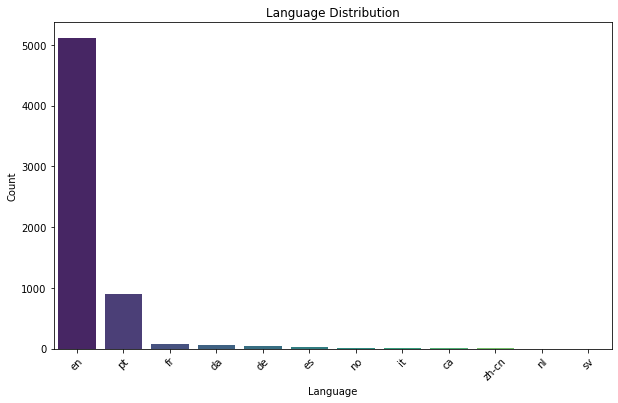

In [28]:
language_counts = train["language"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [29]:
train["language"].unique()

array(['en', 'pt', 'fr', 'es', 'de', 'da', 'no', 'sv', 'it', 'ca',
       'zh-cn', 'nl'], dtype=object)

'en': English 
'pt': Portuguese
'fr': French
'es': Spanish
'de': German
'da': Danish
'no': Norwegian
'sv': Swedish
'it': Italian
'ca': Catalan
'zh-cn': Chinese (Simplified)
'nl': Dutch

In [30]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

test["language"] = test["description"].apply(detect_language)
test.head()

,houseID,description,host_about,language
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...,en
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ...",en
3,4,Charming Apartment Close to the Bay of Cascais...,:),en
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...,pt


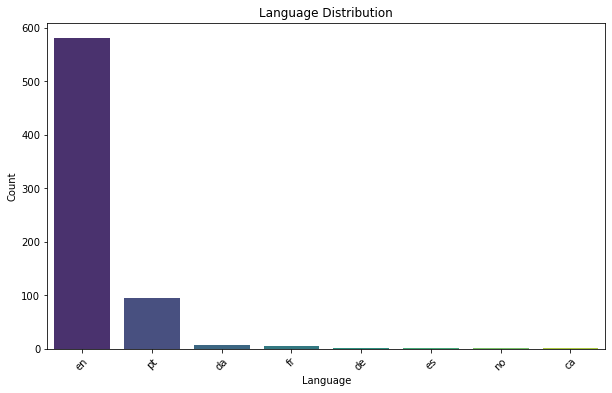

In [31]:
language_counts_test = test["language"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts_test.index, y=language_counts_test.values, palette="viridis")
plt.title("Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [32]:
test["language"].unique()

array(['en', 'pt', 'fr', 'de', 'da', 'es', 'no', 'ca'], dtype=object)

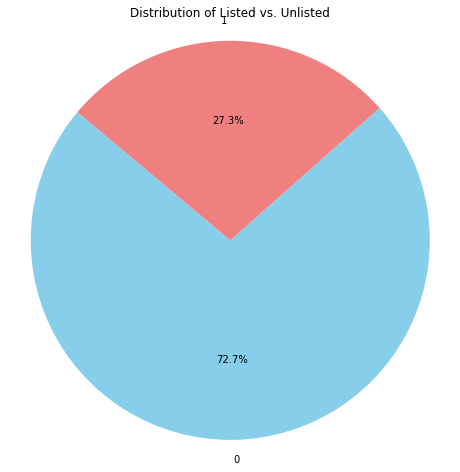

In [33]:
unlisted_counts = train['unlisted'].value_counts()

# Plotting the pie chart for the 'unlisted' column
plt.figure(figsize=(8, 8))
plt.pie(unlisted_counts, labels=unlisted_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Listed vs. Unlisted')
plt.axis('equal')  
plt.show()

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Joining all the reviews into a single string, replacing NaNs with empty strings
all_reviews = ' '.join(str(comment) for comment in train_reviews['comments'] if pd.notna(comment))

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud')
plt.show()


ValueError: Only supported for TrueType fonts

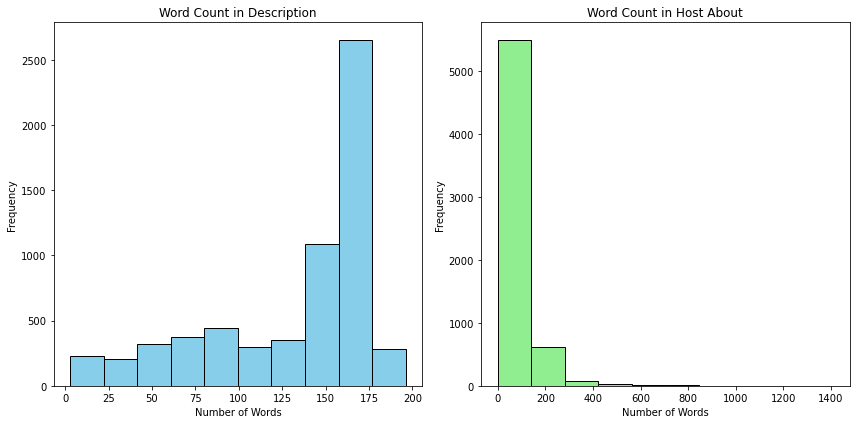

In [35]:
def count_words(text):
    return len(text.split())

# Apply word count function to each column
train['description_word_count'] = train['description'].apply(count_words)
train['host_about_word_count'] = train['host_about'].apply(count_words)

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for description word count
plt.subplot(1, 2, 1)
plt.hist(train['description_word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Description')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for host_about word count
plt.subplot(1, 2, 2)
plt.hist(train['host_about_word_count'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Word Count in Host About')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

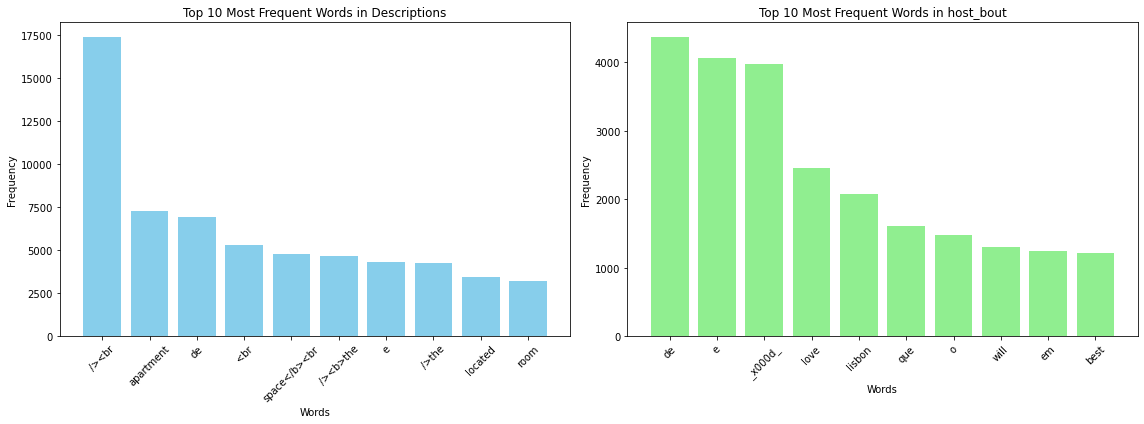

In [36]:
from collections import Counter
from wordcloud import STOPWORDS

def count_word_frequencies(text_column, num_words=10):
    # Join all text from the specified column into a single string
    all_text = ' '.join(text_column)

    # Convert text to lowercase and split into words
    words = all_text.lower().split()

    # Filter out common stop words
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)

# Count word frequencies from the 'description' and 'host_about' columns
top_words_description = count_word_frequencies(train['description'])
top_words_host_about = count_word_frequencies(train['host_about'])

# Plotting the histograms of most frequent words for both columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 'description' column
axes[0].bar(top_words_description.keys(), top_words_description.values(), color='skyblue')
axes[0].set_title('Top 10 Most Frequent Words in Descriptions')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot for 'host_about' column
axes[1].bar(top_words_host_about.keys(), top_words_host_about.values(), color='lightgreen')
axes[1].set_title('Top 10 Most Frequent Words in host_bout')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and display plots
plt.tight_layout()
plt.show()

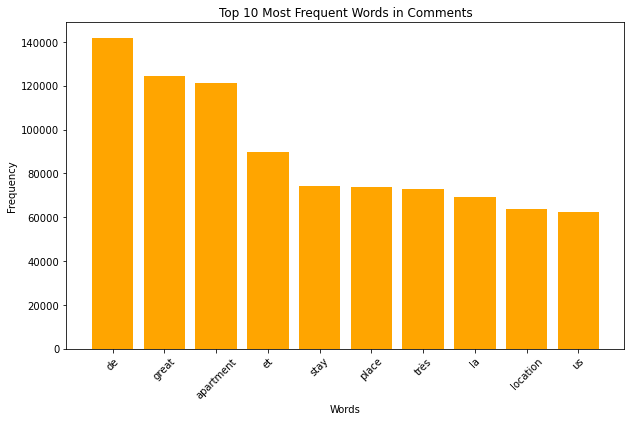

In [37]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

def count_word_frequencies(text_column, num_words=10):
    # Convert each comment to a string and concatenate them into a single text
    words = ' '.join(str(comment) for comment in text_column if pd.notna(comment)).lower().split()

    # Filter out common stop words
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)

# Count word frequencies from the 'comments' column
top_words_comments = count_word_frequencies(train_reviews['comments'])

# Plotting the histogram of most frequent words in 'comments' column
plt.figure(figsize=(10, 6))
plt.bar(top_words_comments.keys(), top_words_comments.values(), color='orange')
plt.title('Top 10 Most Frequent Words in Comments')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


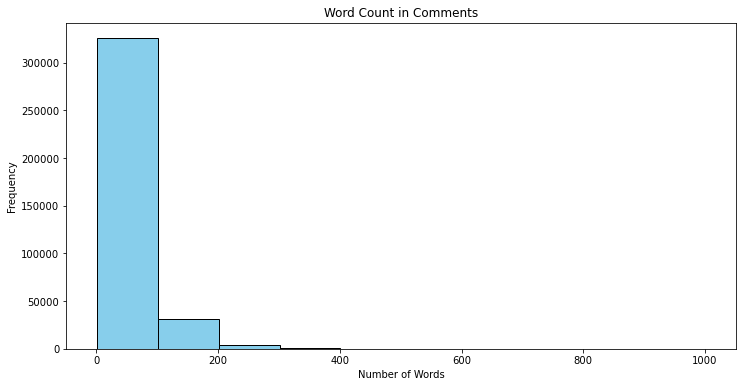

In [38]:
def count_words(text):
    # Convert text to string if it is not and handle NaN values
    if pd.isna(text):
        return 0
    return len(str(text).split())

# Apply word count function to the 'comments' column
train_reviews['comments_word_count'] = train_reviews['comments'].apply(count_words)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(train_reviews['comments_word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Comments')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [39]:
def find_unique_matches(data, column):
    # Convert column data to string type (handle NaN values gracefully)
    column_data = data[column].astype(str)
    
    # Concatenate all comments into a single string
    all_comments = ' '.join(column_data)
    
    # Define a regular expression pattern to match small words and punctuation marks
    pattern = r'\b\w{1,2}\b|[^\w\s]'
    
    # Find all matches of the pattern in the concatenated string
    matches = re.findall(pattern, all_comments)
    
    # Return unique matches using a set comprehension
    return set(matches)


unique_matches = find_unique_matches(train_reviews, 'comments')

# Print the unique small words and punctuation marks
print("Unique small words and punctuation marks:")
print(list(unique_matches))


Unique small words and punctuation marks:
['🤨', '안나', '마저', 'ré', '05', '잇어', 'Ç', '응대', '쿠쿵', 'oä', '높고', '딸린', 'Ts', 'ô', 'nt', 'Ca', '탈', '장난', '햬욥', '🤪', 'oF', '07', 'G', '밤에', '쏙', '택시', '）', 'ㅜㅜ', 'Mø', '2y', 'ми', '锅铲', '비운', '乾淨', 'uz', 'är', '잃게', 'Ty', 'üç', 'ÁL', '놀고', '할게', 'QG', '🖒', '📞', 'qq', '할수', '근방', '상', '나온', 'Ut', '58', '돈을', '你好', '👍', 'Us', 'AZ', '떠나', 'A5', '19', 'kg', '98', '와서', 'Ay', '분도', 'ni', '저를', 'R', 'Ф', '♂', '언능', '💚', '원체', '없이', '거림', 've', '设施', '몸이', '못감', 'Gb', 'να', 'oh', '루소', '오심', 'או', '7m', '뿔꽃', 'Но', 'ő', '4ᵉ', '当然', 'VH', 'Qf', '많이', 'Ap', '갔을', '역도', '고급', 'L6', 'Wg', '편리', '받진', '✊', '될', 'ᴗ', '\U000e0062', 'LC', 'E6', '남을', '짐작', 'αν', '탈수', '에그', 'ud', '살고', '알토', 'TM', '때가', '2o', '安全', 'הצ', '켤', '잠만', '₽', '이면', 'و', '것', '🥶', 'ды', '타도', '할인', 'ст', '봐서', '57', '딥이', '살지', '나옴', '오후', '雨棚', 'ad', 'Ur', 'F', 'út', 'S', 'W', 'Т', 'BH', '묵고', 'Su', '체크', 'id', '이나', 'Pa', '整齐', '熱情', '망치', '매직', 'RE', '실고', '같음', '🤝', '곳과', '🧼', 'c

lots of emojis and small words


In [40]:
merged_data = pd.merge(train, train_reviews,  on='houseID', how='left')



In [41]:
test_merged_data = pd.merge(test, test_reviews,  on='houseID', how='left')


In [42]:
merged_data.drop(["description_word_count", "host_about_word_count", "comments_word_count"], axis=1, inplace=True)


In [43]:
merged_data

,houseID,description,host_about,unlisted,language,comments
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,this is a very cozy and comfortable house to s...
1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,good<br/>
2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,"My first hostel experience, and all I have to ..."
3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,Das Hostel war neu und deshalb funktionierte a...
4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,"It was fine for a dorm, but I think for the pe..."
...,...,...,...,...,...,...
363279,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,The location was perfect. The apartment was ve...
363280,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,Ana's place is exactly as described and even b...
363281,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,A Ana foi muito atenciosa e preocupou se com o...
363282,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,No wifi nor answer. <br/>The wifi can’t be con...


In [44]:
test_merged_data

,houseID,description,host_about,language,comments
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Thank you very much Antonio ! All has been per...
1,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Very nice appartment in the old town of Lissab...
2,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,When travelling we're looking for kids friendl...
3,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,We've been in Lisbon in march 2013 (3 adults a...
4,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Our host Antonio was very helpful with informa...
...,...,...,...,...,...
42081,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Everything was fine!
42082,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Very good located
42083,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Appartement confortable conforme aux photos bi...
42084,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Très bon logement pour un week-end prolongé à ...


In [45]:
merged_data.isna().sum()

houseID           0
description       0
host_about        0
unlisted          0
language          0
comments       2003
dtype: int64

In [46]:
test_merged_data.isna().sum()

houseID          0
description      0
host_about       0
language         0
comments       220
dtype: int64

 For predicting whether an Airbnb listing is unlisted (0) or not (1), missing comments might indeed carry valuable information. The absence of comments could be an important feature in itself, potentially indicating something about the listing's status. Removing could lose some valuable info for predicting. 
 Different approaches : 
 

- Create a binary feature indicating whether a comment is missing (NaN) or not. This helps the model understand that the absence of a comment itself might be significant.
Fill Missing Comments with a Placeholder:

- Replace NaN values in the comments column with a placeholder text (e.g., "no_comment"). This ensures that all entries are treated as valid strings.

- both

In [47]:
merged_data['comments'].fillna('no_review', inplace=True)
test_merged_data['comments'].fillna('no_review', inplace=True)


In [48]:
merged_data.isna().sum()

houseID        0
description    0
host_about     0
unlisted       0
language       0
comments       0
dtype: int64

### emojis treatment


The demojize() function takes a string as input and returns the string with the Unicode characters replaced by their corresponding emoji names. For example, if you pass the string “😀” to the demojize() function, it will return the string “smiley face”.
https://codeforgeek.com/python-emoji-module/ emoji for python
By default, the language is English (language='en') but also supported languages are:

Spanish ('es')

Portuguese ('pt')

Italian ('it')

French ('fr')

German ('de')

Farsi/Persian ('fa')

Indonesian ('id')

Simplified Chinese ('zh')

Japanese ('ja')

Korean ('ko')

Russian ('ru')

Arabic ('ar')

Turkish ('tr')

In [49]:
import emoji
# Function to check for emojis
def has_emojis(text):
    if pd.isnull(text):
        return False
    return emoji.emoji_count(str(text)) > 0

# Function to convert emojis to text
def convert_emojis_to_text(dataframe, column_text, column_language):
    dataframe_copy = dataframe.copy()

    def convert_text(text, language):
        if has_emojis(text):
            try:
                return emoji.demojize(text, language=language)
            except:
                return emoji.demojize(text, language='en')
        else:
            return text

    # Apply the conversion to each row
    dataframe_copy[column_text] = dataframe_copy.apply(
        lambda row: convert_text(row[column_text], row[column_language]), axis=1
    )
    
    return dataframe_copy





In [50]:
# Convert emojis to text for training data
merged_data_demojized = convert_emojis_to_text(merged_data, 'comments', 'language')

In [51]:
test_merged_data_demojized = convert_emojis_to_text(test_merged_data, 'comments', 'language')


checking if there's still emojis

In [52]:
def print_comments_with_emojis(dataframe, column_text):
    with_emojis = dataframe[dataframe[column_text].apply(has_emojis)]
    print("Comments with emojis after processing:")
    for index, row in with_emojis.iterrows():
        print(f"Index {index}: {row[column_text]}")

print_comments_with_emojis(merged_data_demojized, 'comments')

Comments with emojis after processing:
Index 14728: Wow, the employees, the room, the location, the garden and the coffee where all high class!<br/><br/>We loved it❤️
Index 66611: Good stay in Sintra. They keep my bag before and after check out. Thanks a lot🙂🙂
Index 86480: appartement très agréable , super bien situé. Anna été disponible. <br/>Seuls bémols la literie... et le voisin dus dessus qui semble frustré d'avoir un airbnb en dessous.... 🤭
Index 86507: Ana is very helpful and accommodating host. It was easy to communicate and it was quick replies.<br/><br/>The apartment location is great, it is one step away from Alfama and city center. Also, even though it is a small apartment, it has all you need for your stay.<br/><br/>The only thing I would recommend to keep in mind - its on the third floor, steep stairs and no elevator. ☺️ But we kind of knew where we are going so it was expected.
Index 86515: Hyper bien situé ! La communication A+… Je recommande chaudement l’appartement… V

In [53]:
print_comments_with_emojis(test_merged_data_demojized, 'comments')

Comments with emojis after processing:
Index 13450: Fiquei encantada com o espaço! Super acolhedor, cómodo e cheio de estilo! <br/><br/>Com proximidade a todos os concelhos, tanto estamos na praia como na serra 😊 <br/><br/>Super atenciosos e cuidados os anfitriões! <br/>Gostei muito,<br/> obrigada
Index 13480: Very good - local amenities good - train station if you want to venture further - nothing negative to say 😎
Index 13485: We spent 11 night in this place, and got used to it very much, so light, clean and cozy🤗. Also, we really appreciated its location — easy to get, easy to leave👌 The communication with the host also was very pleasant!👍
Index 13487: Clean and location are great 👍
Index 39134: Apparement top, emplacement geniale!<br/>Vous pouvez y aller les yeux fermés 👍🏼.<br/>Merci


We still have a very small percentage of emojis remaining after running the conversion function, it might be due to several factors such as unsupported emojis, non-standard emoji representations, or limitations in the emoji library. In our to prevent data leakage our decisions will be based on training data, and the test data is processed using the same rules established from the training data.



Based on the training set, we created a dictionary mapping emojis to their textual representations. Any emoji not found in the custom dictionary will be replaced with a generic placeholder :emoji:

textual representations can be found here: https://www.w3schools.com/charsets/ref_emoji_smileys.asp

https://www.geeksforgeeks.org/convert-emoji-into-text-in-python/

In [54]:
remaining_emoji_dict = {
    '💥': ':collision:',
    '🤭': ':face_with_hand_over_mouth:',
    '☺️': ':white_smiling_face:',
    '💪🏽': ':flexed_biceps_dark_skin_tone:',
    '👍': ':thumbs_up:',
    '⭐': ':star:',
    '😊': ':smiling_face_with_smiling_eyes:',
    '👌': ':ok_hand:',
    '👍🏻': ':thumbs_up_light_skin_tone:',
    '😘': ':face_blowing_a_kiss:',
    '🤗': ':hugging_face:',
    '😉': ':winking_face:',
    '🌟': ':glowing_star:',
    '🙂': ':slightly_smiling_face:',
    '😱': ':face_screaming_in_fear:',
    '😃': ':grinning_face_with_big_eyes:',
    '❤️': ':heart:',
    '🥰': ':smiling_face_with_hearts:',
}

In [55]:
import emoji


import emoji

# Define a function to check if a text contains any emojis
def has_emojis(text):
    return any(emoji.is_emoji(char) for char in text)

# Define a function to replace the remaining emojis using a custom dictionary
def custom_replace_remaining_emojis(text, emoji_dict):
    for emj, desc in emoji_dict.items():
        text = text.replace(emj, desc)
    return text

# Define a function to replace any unknown emojis with a placeholder
def replace_unknown_emojis(text):
    return emoji.replace_emoji(text, replace=":emoji:")

# Define a function to process remaining emojis in the dataframe
def process_remaining_emojis(dataframe, column_text, emoji_dict):
    dataframe_copy = dataframe.copy()

    def convert_text_with_remaining_dict(text):
        if has_emojis(text):
            text = custom_replace_remaining_emojis(text, emoji_dict)
            text = replace_unknown_emojis(text)
            return text
        else:
            return text

    dataframe_copy[column_text] = dataframe_copy[column_text].apply(convert_text_with_remaining_dict)
    return dataframe_copy






In [56]:
merged_data_demojized = process_remaining_emojis(merged_data_demojized, 'comments', remaining_emoji_dict)
test_merged_data_demojized = process_remaining_emojis(test_merged_data_demojized, 'comments', remaining_emoji_dict)





In [57]:
def print_comments_with_emojis(dataframe, column_text):
    with_emojis = dataframe[dataframe[column_text].apply(has_emojis)]
    print("Comments with emojis after processing:")
    for index, row in with_emojis.iterrows():
        print(f"Index {index}: {row[column_text]}")

print_comments_with_emojis(merged_data_demojized, 'comments')
print_comments_with_emojis(test_merged_data_demojized, 'comments')

Comments with emojis after processing:
Comments with emojis after processing:


# Train- test- Split

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(merged_data[['description', 'host_about', 'language', 'comments']], merged_data_demojized[['unlisted', 'houseID']], test_size=0.2, random_state=42)





In [139]:
# Create copies of the split data
X_train_copy = X_train.copy()
X_val_copy = X_val.copy()
y_train_copy = y_train.copy()
y_val_copy = y_val.copy()


# Pre-Processing

### Cleaning Language

In [140]:
language_counts = X_train['language'].value_counts()

total_entries = len(X_train)
language_percentages = (language_counts / total_entries) * 100

print("\nLanguage Percentages:")
print(language_percentages)


Language Percentages:
en       90.110692
pt        8.105923
fr        0.876725
da        0.396384
es        0.258751
de        0.228127
zh-cn     0.019613
no        0.001376
ca        0.001032
it        0.000688
nl        0.000688
Name: language, dtype: float64


Como ingles e portugues representam 98% eu acho que podiamos apagar as restantes linguas até porque testamos com o translate e não funcionada muito bem e era demorado

In [141]:
desired_languages = ['en', 'pt']
X_train = X_train[X_train['language'].isin(desired_languages)]

### Cleaning data (stopwords, lemmanize, lowering, stemming)

# NÃO SEI SE ESTÁ BEM FEITO I NEED HELP

In [71]:
import re
from tqdm import tqdm
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

stopwords_en = set(stopwords.words('english'))
stopwords_pt = set(stopwords.words('portuguese'))
stemmer_en = SnowballStemmer('english')
stemmer_pt = SnowballStemmer('portuguese')
lemma = WordNetLemmatizer()  

def clean_text(text, language='en', use_lemmatizer=True, use_stemmer=True):
    text = text.lower()
    
    text = re.sub("<br />", "", text)
    text = re.sub("[^a-zA-Z]", " ", text)
    
    if language in ['english', 'en']:
        stop = stopwords_en
        stemmer = stemmer_en
    elif language in ['portuguese', 'pt']:
        stop = stopwords_pt
        stemmer = stemmer_pt
    else:
        raise ValueError("Unsupported language: " + language)
    
    text = " ".join([word for word in text.split() if word not in stop])
    
    if use_lemmatizer and language in ['english', 'en']:
        text = " ".join(lemma.lemmatize(word) for word in text.split())
    
    if use_stemmer:
        text = " ".join(stemmer.stem(word) for word in text.split())
        
    return text

def clean_comments(df):
    tqdm.pandas()  
    df = df[df['language'].isin(['english', 'portuguese', 'en', 'pt'])]
    print("DataFrame before cleaning:\n", df)
    df['clean_comments'] = df.progress_apply(lambda row: clean_text(row['comments'], row['language']), axis=1)
    return df

X_train = clean_comments(X_train)

print(X_train)


DataFrame before cleaning:
                                               description  \
296776  This apartment is the best choice for those wh...   
97872   "Bijou, cute, amazing, lovers' retreat, honeym...   
306410  Bairro Alto is one of the liveliest and younge...   
35677   Located in one of the most traditional distric...   
230579  Central location, ideal for exploring Lisbon. ...   
...                                                   ...   
119879  The Mouraria Duplex Apartment is located on th...   
259178  Amazing Modern one bedroom apartment near Merc...   
131932  A Fantastic Comfy 1 Bed Apartment with finely ...   
146867  Bed in a 4 mixed dorm shared wc<br /><br /><b>...   
121958  Ideal para  2 pessoas pode acomoda até 4 pesso...   

                                               host_about language  \
296776  Hi, my name is David and I'm renting out sever...       en   
97872   I am english, living in Sintra, and my husband...       en   
306410                     Ba

100%|████████████████████████████████| 285444/285444 [02:11<00:00, 2170.04it/s]

                                              description  \
296776  This apartment is the best choice for those wh...   
97872   "Bijou, cute, amazing, lovers' retreat, honeym...   
306410  Bairro Alto is one of the liveliest and younge...   
35677   Located in one of the most traditional distric...   
230579  Central location, ideal for exploring Lisbon. ...   
...                                                   ...   
119879  The Mouraria Duplex Apartment is located on th...   
259178  Amazing Modern one bedroom apartment near Merc...   
131932  A Fantastic Comfy 1 Bed Apartment with finely ...   
146867  Bed in a 4 mixed dorm shared wc<br /><br /><b>...   
121958  Ideal para  2 pessoas pode acomoda até 4 pesso...   

                                               host_about language  \
296776  Hi, my name is David and I'm renting out sever...       en   
97872   I am english, living in Sintra, and my husband...       en   
306410                     Bairro Alto, fun & rock & roll

### Removing Punctuation

In [142]:
def remove_punctuation(text):
    punctuation_set = set(string.punctuation)
    
    text_no_punctuation = ''.join([char for char in text if char not in punctuation_set])
    
    return text_no_punctuation

X_train["comments"] = X_train["comments"].apply(remove_punctuation)


### Removing accents 

In [144]:
from unidecode import unidecode
import unicodedata
import re

accent_mapping = {
    'à': 'a', 'á': 'a', 'â': 'a', 'ã': 'a', 'ä': 'a', 'å': 'a', 'æ': 'ae', 'ā': 'a',
    'è': 'e', 'é': 'e', 'ê': 'e', 'ë': 'e', 'ē': 'e',
    'ì': 'i', 'í': 'i', 'î': 'i', 'ï': 'i',
    'ò': 'o', 'ó': 'o', 'ô': 'o', 'õ': 'o', 'ö': 'o', 'ø': 'o', 'œ': 'oe',
    'ù': 'u', 'ú': 'u', 'û': 'u', 'ü': 'u', 'ū': 'u', 'ů': 'u',
    'ç': 'c',
    'ñ': 'n',
    'ś': 's', 'š': 's', 'ß': 'ss',
    'ź': 'z', 'ż': 'z', 'ž': 'z'
}

def remove_accents(text):
    for char in accent_mapping:
        text = text.replace(char, accent_mapping[char])
    return text

X_train["comments"] = X_train["comments"].apply(remove_accents)


### Tokenization

In [146]:
import nltk
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')  
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\barbara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\barbara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\barbara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [147]:
X_train["comments"] = X_train['comments'].apply(word_tokenize)